In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install tensorflow

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

import xgboost as xgb

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")


In [52]:
data = pd.read_csv('SolarPrediction.csv.zip')

In [54]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [58]:
df = data.copy()

In [62]:
df['Data'] = df['Data'].apply(lambda x: x.split()[0])
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [72]:
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day

df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [76]:
df['risehour'] = df['TimeSunRise'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['riseminute'] = df['TimeSunRise'].apply(lambda x: re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df['sethour'] = df['TimeSunSet'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x: re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [90]:
columns_to_drop = ['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet']

df.drop([col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

print(df.head())


   Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Month  Day  Hour  Minute  Second  risehour  riseminute  sethour  setminute  
0      9   29    23      55      26         6          13       18         13  
1      9   29    23      50      23         6          13       18         13  
2      9   29    23      45      26         6          13       18         13  
3      9   29    23      40      21         6          13       18         13  
4      9   29    23      35      24         6          13       18         13  


In [96]:
# Feature selection using correlation matrix

corr_matrix = df.corr()
corr_matrix

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
Day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,0.008629,-0.007056
Minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,0.001052,-0.002215


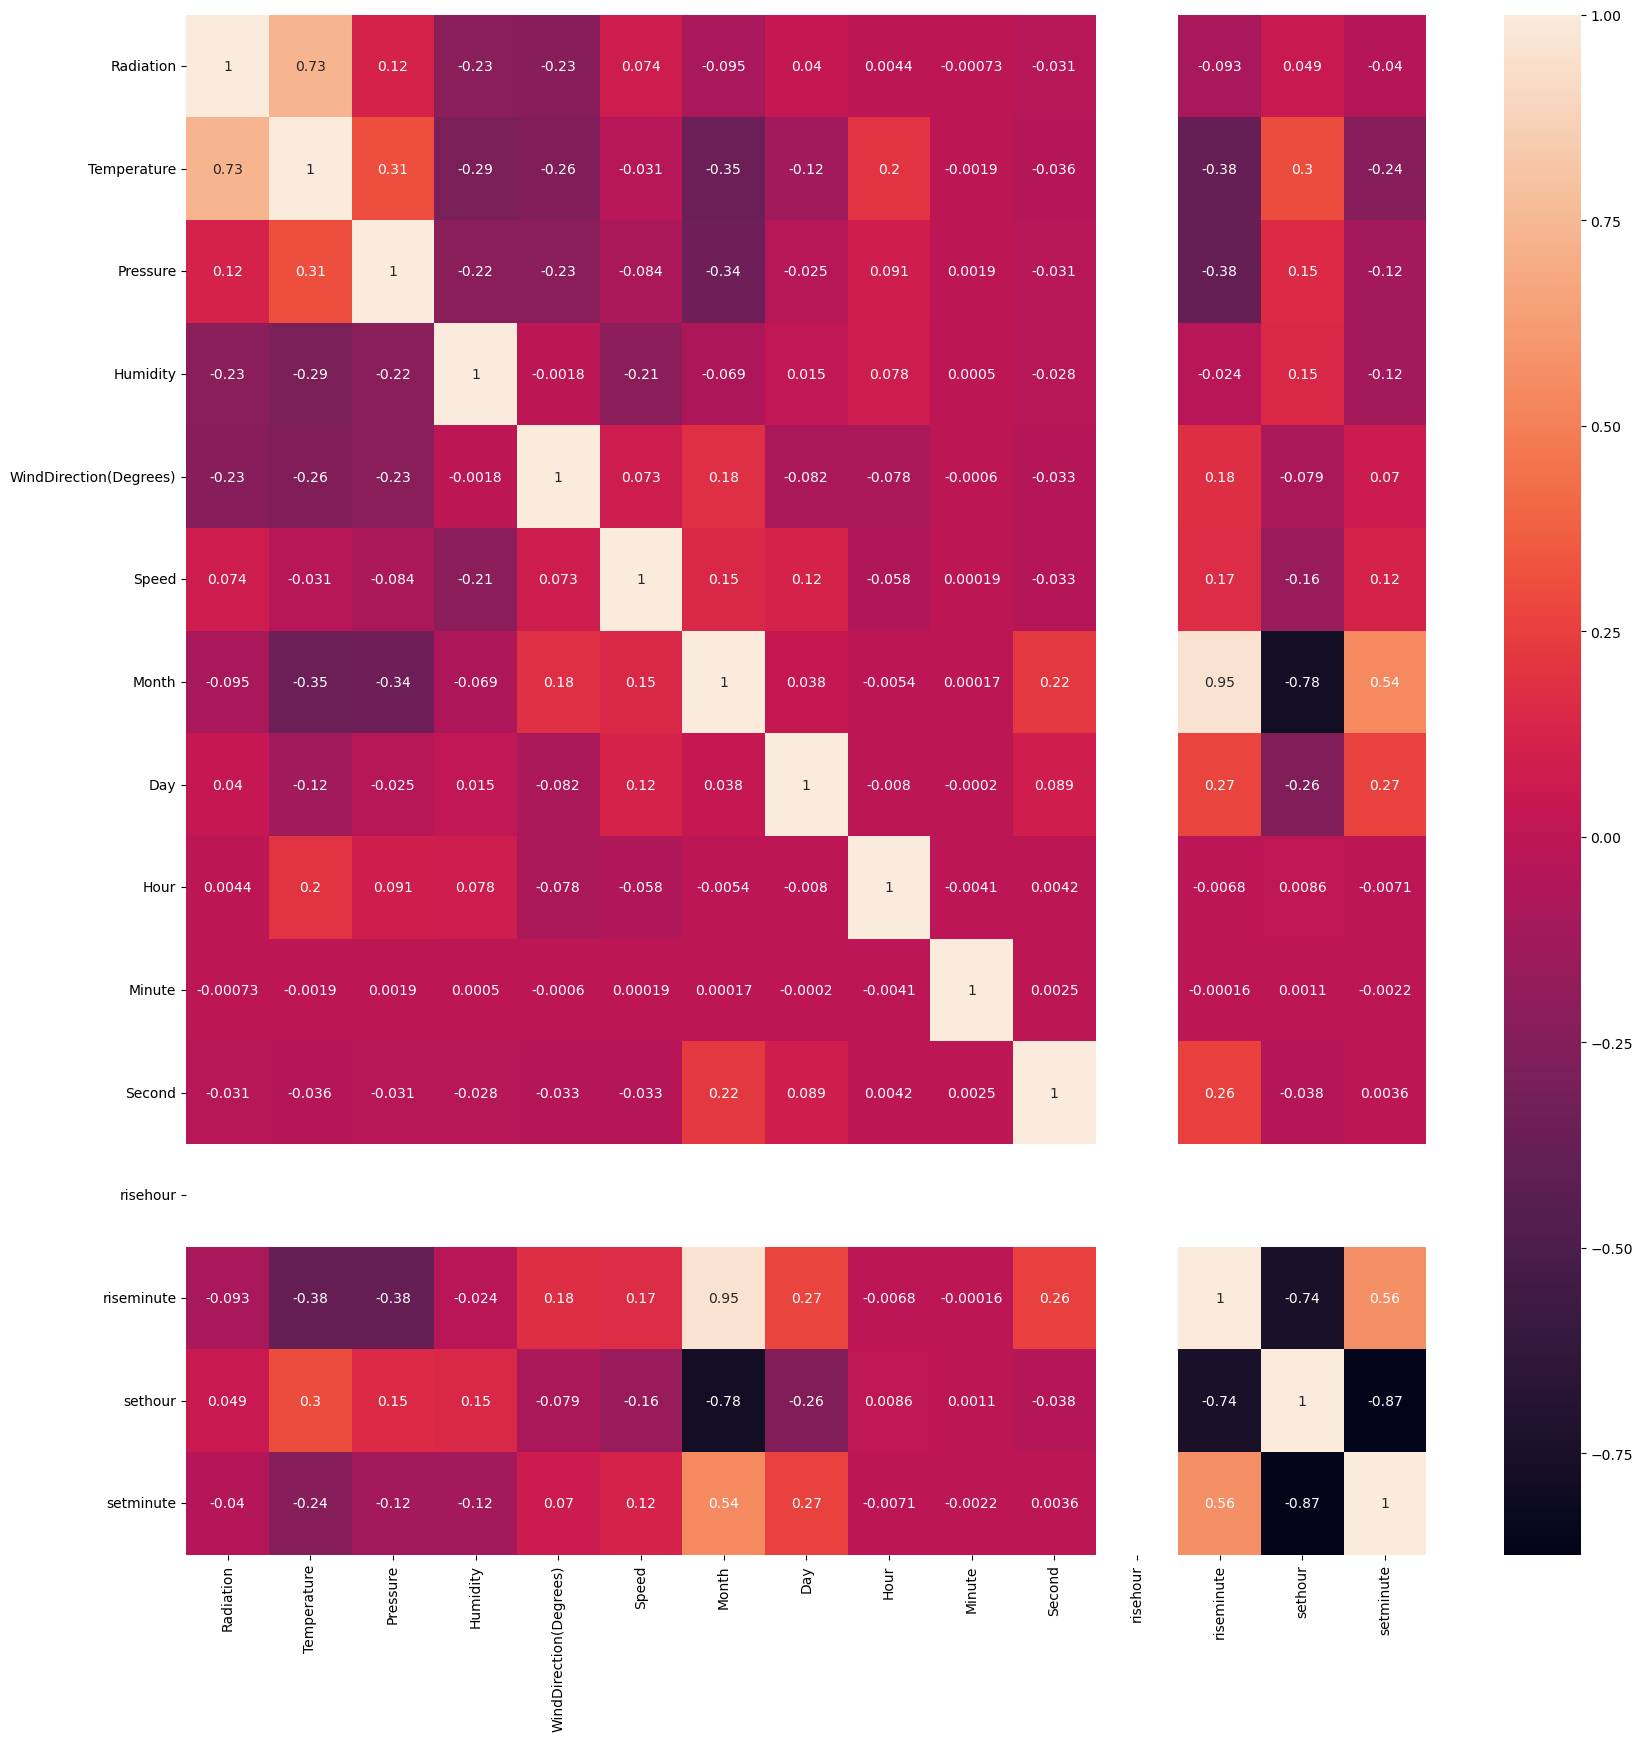

In [98]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [108]:
bestfeatures = SelectKBest(score_func = chi2, k=10)

input_features = df.drop(['Radiation'], axis=1)
target = df['Radiation']

In [112]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_Y = label_encoder.fit_transform(target)


In [114]:
target_cont = df['Radiation'].apply(lambda x: int(x*100))

In [116]:
target_cont[:5]

0    121
1    121
2    123
3    121
4    117
Name: Radiation, dtype: int64

In [118]:
scaled_input_features = MinMaxScaler().fit_transform(input_features)
fit = bestfeatures.fit(scaled_input_features, target_cont)

In [120]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(input_features.columns)

In [122]:
featureScores = pd.concat([column, scores], axis=1)

In [126]:
featureScores.columns = ['Features', 'feature_imp']

In [130]:
featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)

In [132]:
featureScores

,Features,feature_imp
12,sethour,12207.531454
5,Month,4684.579610
11,riseminute,4015.062771
3,WindDirection(Degrees),3271.827277
6,Day,2841.926850
8,Minute,2702.449333
9,Second,2288.673032
13,setminute,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


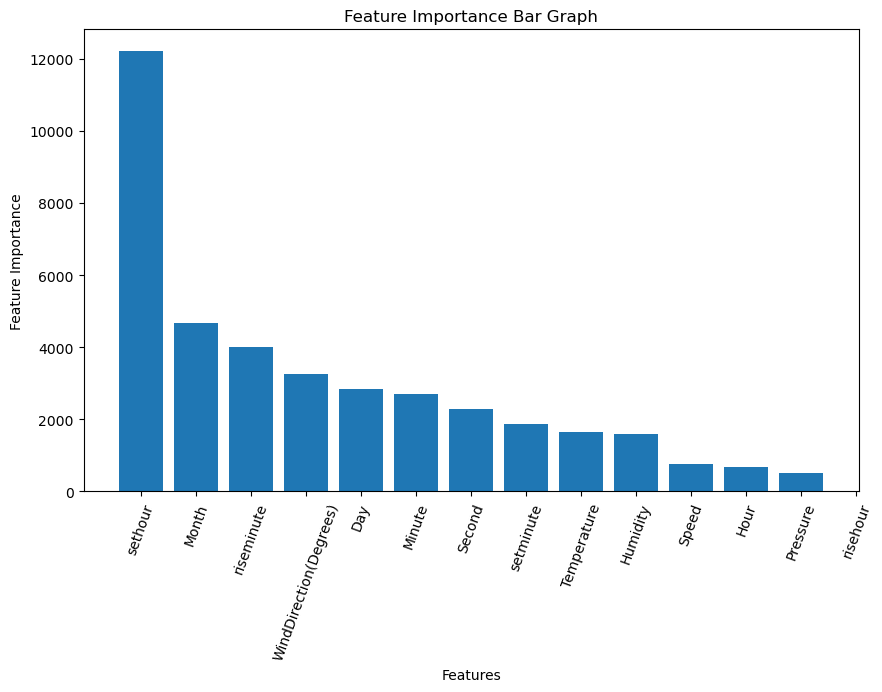

In [138]:
plt.figure(figsize=(10, 6))
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xticks(rotation = 70)

plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Bar Graph')

plt.show()

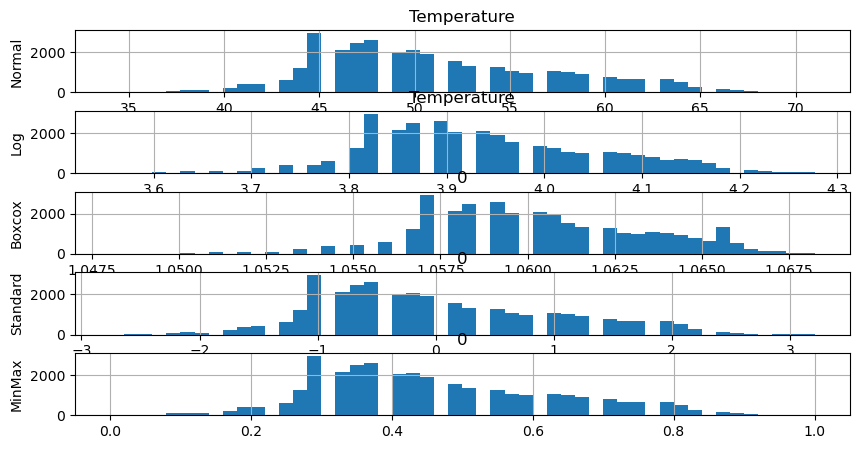

In [169]:
# Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in features_to_transform:
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
    
    pd.DataFrame(input_features[i]).hist(ax = ax1, bins=50)
    pd.DataFrame((input_features[i]+1).transform(np.log)).hist(ax = ax2, bins=50)
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax = ax3, bins=50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax4, bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax5, bins=50)

    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Boxcox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

    break

In [173]:
transform = {'Temperature': (input_features['Temperature']+1).transform(np.log),
             'Pressure': stats.boxcox(input_features['Pressure']+1)[0],
             'Humidity': stats.boxcox(input_features['Humidity']+1)[0],
             'Speed': (input_features['Speed']+1).transform(np.log),
             'WindDirection': MinMaxScaler().fit_transform(np.array(input_features['WindDirection(Degrees)']).reshape(-1, 1))}

In [175]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute
0,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


In [177]:
for i in transform:
    input_features[i] = transform[i]

In [179]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminute,sethour,setminute,WindDirection
0,3.89182,1.245832e+297,1139.358153,177.39,1.890095,9,29,23,55,26,6,13,18,13,0.492692
1,3.89182,1.245832e+297,1104.046486,176.78,1.474763,9,29,23,50,23,6,13,18,13,0.490996
2,3.89182,1.245832e+297,1069.253069,158.75,1.474763,9,29,23,45,26,6,13,18,13,0.440894
3,3.89182,1.245832e+297,1175.186958,137.71,1.474763,9,29,23,40,21,6,13,18,13,0.382426
4,3.89182,1.245832e+297,1248.391644,104.95,1.890095,9,29,23,35,24,6,13,18,13,0.291391


In [183]:
# preparing data standardizing and splitting

xtrain, xtest, ytrain, ytest = train_test_split(input_features, target, test_size=0.2, random_state = 1)
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [187]:
xtrain.shape, xtest.shape

((26148, 15), (6538, 15))

In [189]:
# XGBOOST

from xgboost import XGBRegressor

params = {"learning_rate": 0.1,
            "max_depth": 8}

model = XGBRegressor(**params)

In [191]:
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [193]:
y_pred = model.predict(xtest)

In [195]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print("testing performance")

print("RMSE: {:.2f}".format(rmse))

print("R2: {:.2f}".format(r2))

testing performance
RMSE: 82.99
R2: 0.93


In [219]:
input_features.shape

(32686, 15)

In [223]:
# using multilayer precipitation for model

model = Sequential()

model.add(Dense(128, activation="relu", input_dim=15))
model.add(Dropout(0.33))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.33))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.33))


model.add(Dense(1, activation="relu"))


model.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))


print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [225]:
history = model.fit(
    xtrain,               # Training features
    ytrain,               # Training labels
    validation_split=0.1, # Use 10% of the training data for validation
    epochs=50,            # Number of epochs
    batch_size=32,        # Batch size             # Display training progress
)

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 212.3039 - mse: 147926.9531 - val_loss: 204.2296 - val_mse: 136737.7500
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - loss: 209.9468 - mse: 145082.2188 - val_loss: 204.2296 - val_mse: 136737.7500
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 211.3127 - mse: 145564.5156 - val_loss: 204.2296 - val_mse: 136737.7500
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - loss: 209.1385 - mse: 143629.8906 - val_loss: 204.2296 - val_mse: 136737.7500
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 212.0148 - mse: 147315.1094 - val_loss: 204.2296 - val_mse: 136737.7500
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - loss: 207.9435 - mse: 144047.7500 - val_loss: 204.2296 - val_mse: 136737.7500
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - loss: 211.3426 - mse: 146356.5938 - val_loss: 204.2296 - val_mse: 136737.7500
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - loss: 21

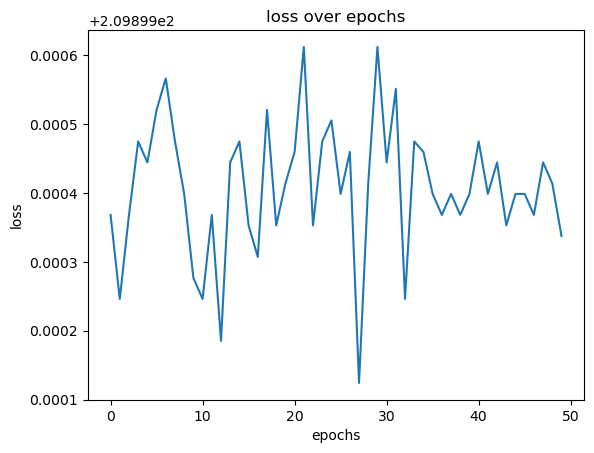

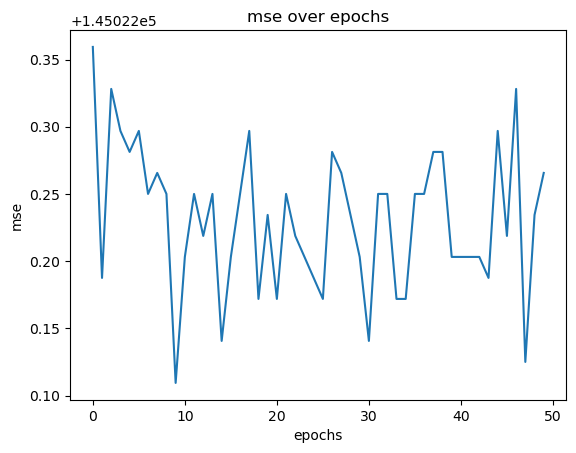

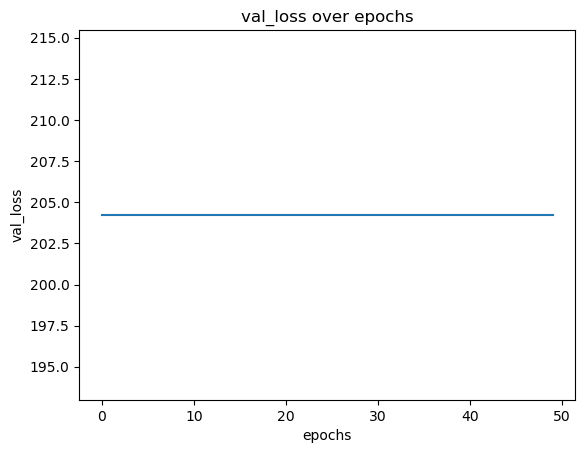

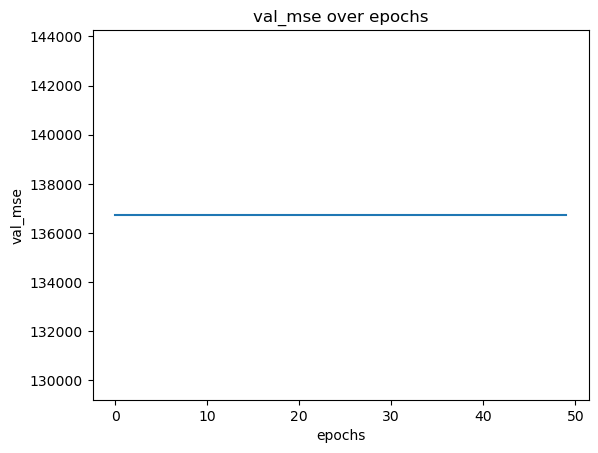

In [227]:
fit = history.history

for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [233]:
mean_absolute_error(ytest, model.predict(xtest))

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step


198.2952630773937

In [ ]:
y_pred = model.predict()